## First we will use pandas-datareader package to be able to access data from Yahoo! Finance directly

In [1]:
import pandas_datareader as pdr
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns


%matplotlib inline 

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

#### resulting object aapl is a DataFrame, let's run head() to take a peek at the first and the last rows and describe() to get some useful summary statistics about data.

In [2]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.287629
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.263793
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.303519
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.286713
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.268071


In [3]:
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,7.309392,7.126921,7.225253,7.222288,7.531586e+08,6.179717
std,3.549753,3.507440,3.530783,3.529933,4.108027e+08,3.020371
min,2.642143,2.592857,2.622143,2.615357,1.574944e+08,2.237818
25%,4.438214,4.295536,4.364464,4.357857,4.488148e+08,3.728780
50%,6.410714,6.181428,6.315000,6.280000,6.519464e+08,5.373454
75%,9.783215,9.587857,9.694286,9.675000,9.264920e+08,8.278368
max,15.239285,14.856786,15.062857,15.080000,3.372970e+09,12.903131


the observations for each day give us an idea of the opening and closing price for that day and the extreme high and low price movement for a particular stock during that day.

Volume column is used to register the number of shares that got traded during a single day. 
While Adj Close is the closing price of the day that has been slightly adapted to include any actions that occurred at any time before the next day’s open

## Lets Inspect the first rows of 2007 

In [4]:
print(aapl.loc['2007'].head())

                High       Low      Open     Close      Volume  Adj Close
Date                                                                     
2007-01-03  3.092143  2.925000  3.081786  2.992857  1238319600   2.560825
2007-01-04  3.069643  2.993572  3.001786  3.059286   847260400   2.617664
2007-01-05  3.078571  3.014286  3.063214  3.037500   834741600   2.599023
2007-01-08  3.090357  3.045714  3.070000  3.052500   797106800   2.611857
2007-01-09  3.320714  3.041071  3.087500  3.306072  3349298400   2.828825


we will notice that there are certain days missing in the data;These days are traditionally weekend days or public holidays. So it’s completely normal, and we don’t have to fill in these missing days.

### to know data a little bit better, Let’s resample the data so that aapl is now at the monthly level instead of daily.

In [5]:
monthly_aapl = aapl.resample('M').mean()
print(monthly_aapl.head())

                High       Low      Open     Close        Volume  Adj Close
Date                                                                       
2006-10-31  2.780942  2.723279  2.750731  2.754497  6.539980e+08   2.356872
2006-11-30  3.078656  3.007245  3.040391  3.048027  6.588040e+08   2.608030
2006-12-31  3.136625  3.051393  3.103964  3.088268  8.445396e+08   2.642462
2007-01-31  3.220214  3.130643  3.180589  3.174339  1.360489e+09   2.716109
2007-02-28  3.095733  3.027951  3.063026  3.061711  7.222292e+08   2.619738


### lets calculate the differences between the opening and closing prices per day and then delete it again

In [6]:
aapl['diff']= aapl.Open - aapl.Close
aapl['diff'].describe()

count    1323.000000
mean        0.002965
std         0.127558
min        -0.522500
25%        -0.066250
50%        -0.001429
75%         0.067679
max         0.512857
Name: diff, dtype: float64

In [7]:
del aapl['diff']

# Visualizing

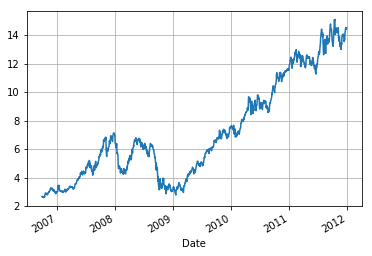

In [8]:
aapl['Close'].plot(grid=True)

In [9]:
aapl.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

# Return:
this term represents the amount of percentage change in the value of a stock over a single day of trading

###### divide the daily_close values by the `daily_close.shift(1) -1`. By using this function, we will be left with NA values at the beginning of the resulting DataFrame.

In [13]:
daily_close = aapl[['Close']]
daily_pct_change = daily_close / daily_close.shift(1) - 1
daily_pct_change.fillna(0, inplace=True)

print(daily_pct_change.head())

               Close
Date                
2006-10-02  0.000000
2006-10-03 -0.010419
2006-10-04  0.017549
2006-10-05 -0.007296
2006-10-06 -0.008152


### Daily log returns gives better insight into the growth of returns over time.

In [14]:
daily_log_returns=np.log(daily_pct_change+1)
print(daily_log_returns.head())

               Close
Date                
2006-10-02  0.000000
2006-10-03 -0.010474
2006-10-04  0.017396
2006-10-05 -0.007323
2006-10-06 -0.008185


# Plot the distribution of `daily_pct_change`

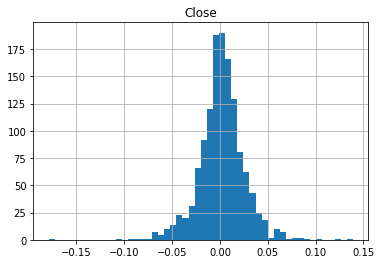

             Close
count  1323.000000
mean      0.001565
std       0.023983
min      -0.179195
25%      -0.010661
50%       0.001646
75%       0.014285
max       0.139050


In [15]:
daily_pct_change.hist(bins=50)
plt.show()
print(daily_pct_change.describe())

The distribution looks very symmetrical and normally distributed. we see that the mean is very close to the 0.00 bin also and that the standard deviation is 0.02 and we know how many of our data points fall below -0.010661, 0.001647 and 0.014285

### cumulative daily rate of return is useful to determine the value of an investment at regular intervals.calculate it by using the daily percentage change values, adding 1 to them and calculating the cumulative product with the resulting values

               Close
Date                
2006-10-02  1.000000
2006-10-03  0.989581
2006-10-04  1.006946
2006-10-05  0.999599
2006-10-06  0.991451


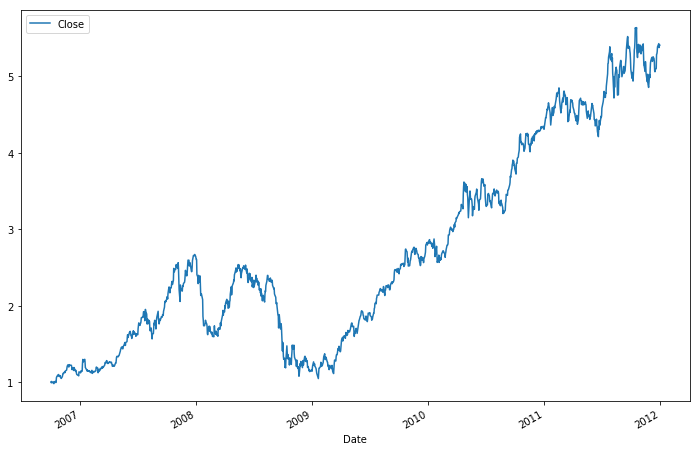

In [16]:
cum_daily_return = (1 + daily_pct_change).cumprod()
print(cum_daily_return.head())
cum_daily_return.plot(figsize=(12,8))

these numbers don’t really say much when you don’t compare them to other stock. we will focus on getting more data from Yahoo! Finance so that we can calculate the daily percentage change and compare the results.

### Get more data from Yahoo! Finance first. by making a function that takes in the ticker, start date and an end date. anothr function takes the ticker to get your data from the startdate to the end date and map the data with the right tickers.

In [17]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
df = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))

In [19]:
df.head()

High       Low      Open     Close       Volume  \
Ticker Date                                                              
AAPL   2006-10-02  2.709643  2.653571  2.682143  2.673571  712639200.0   
       2006-10-03  2.676786  2.613929  2.658929  2.645714  790708800.0   
       2006-10-04  2.695000  2.612857  2.646429  2.692143  829082800.0   
       2006-10-05  2.720000  2.647500  2.661786  2.672500  683883200.0   
       2006-10-06  2.680000  2.636071  2.657857  2.650714  466958800.0   

                   Adj Close  
Ticker Date                   
AAPL   2006-10-02   2.287629  
       2006-10-03   2.263793  
       2006-10-04   2.303519  
       2006-10-05   2.286713  
       2006-10-06   2.268071

In [20]:
daily_close_px = df[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

In [21]:
daily_close_px.head()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-02,2.287629,199.970459,53.955959,20.100994
2006-10-03,2.263793,201.265610,53.810959,20.108341
2006-10-04,2.303519,207.073837,54.766560,20.527109
2006-10-05,2.286713,205.136093,54.647938,20.512413
2006-10-06,2.268071,209.464874,54.792942,20.475677


In [22]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.fillna(0 ,inplace=True)
daily_pct_change.head()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-02,0.000000,0.000000,0.000000,0.000000
2006-10-03,-0.010419,0.006477,-0.002687,0.000366
2006-10-04,0.017548,0.028859,0.017758,0.020826
2006-10-05,-0.007296,-0.009358,-0.002166,-0.000716
2006-10-06,-0.008152,0.021102,0.002653,-0.001791


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D14163E400>,
      dtype=object)

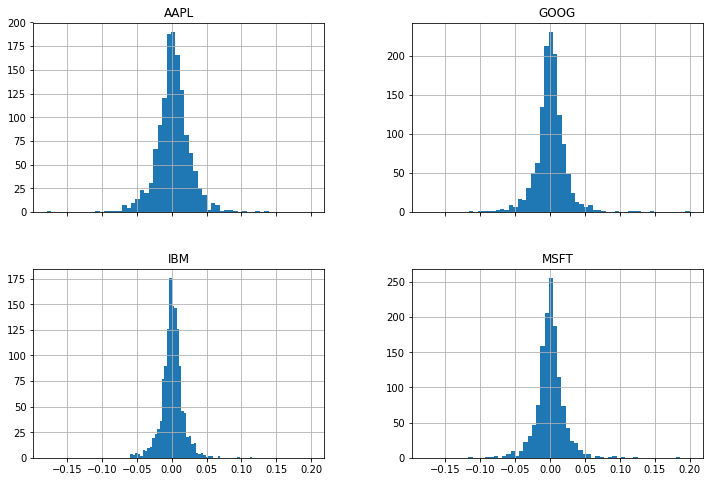

In [23]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

### Another useful plot is the scatter matrix.

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D141696198>,
      dtype=object)

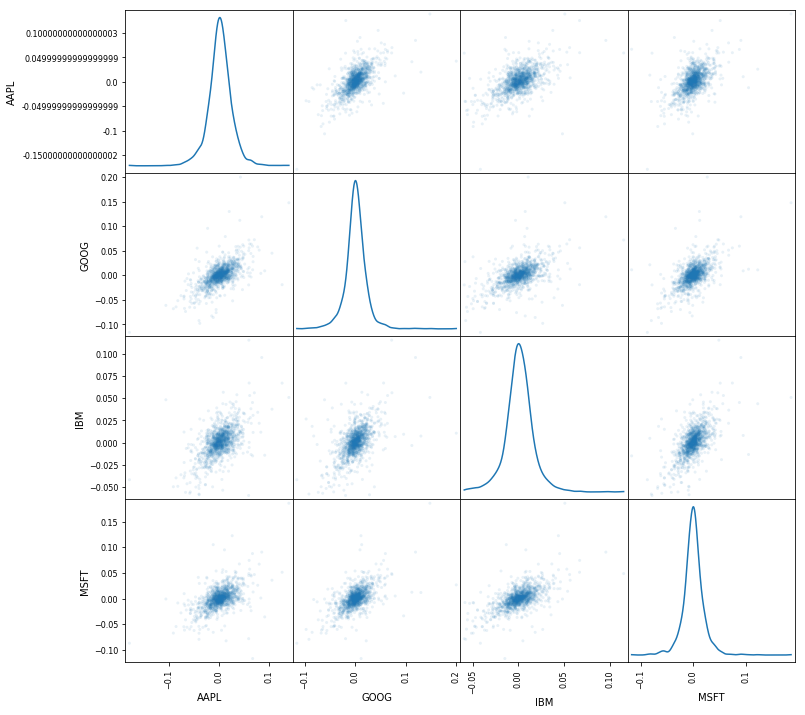

In [24]:
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

by this we have explored returns! Now it’s time to move on to the second term, which is the moving windows.

## Moving windows are there when we compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval.

For example: calculating rolling mean smoothes out short-term fluctuations and highlight longer-term trends in data.

In [25]:
adj_close_px = aapl['Adj Close']
moving_avg = adj_close_px.rolling(window=40).mean()

print(moving_avg[-10:])

Date
2011-12-16    11.878428
2011-12-19    11.870284
2011-12-20    11.862782
2011-12-21    11.861774
2011-12-22    11.860207
2011-12-23    11.859168
2011-12-27    11.860376
2011-12-28    11.858741
2011-12-29    11.865319
2011-12-30    11.871117
Name: Adj Close, dtype: float64


### let's try different values of window argument and make simple plot to see how its affecting the smoothing out and to understand the rolling mean and its actual meaning:

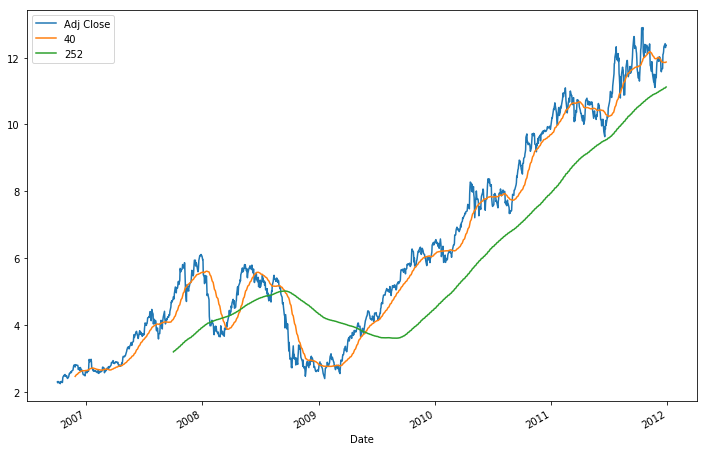

In [26]:
aapl['40'] = adj_close_px.rolling(window=40).mean()
aapl['252'] = adj_close_px.rolling(window=252).mean()

aapl[['Adj Close', '40', '252']].plot(figsize=(12,8))

# volatility:
### is a measurement of the change in variance in the returns of a stock over a specific period of time.
it is calculated by taking a rolling window standard deviation, if we take the window wider and make min_periods larger, our result will become less representative. If we make it smaller and make the window more narrow.

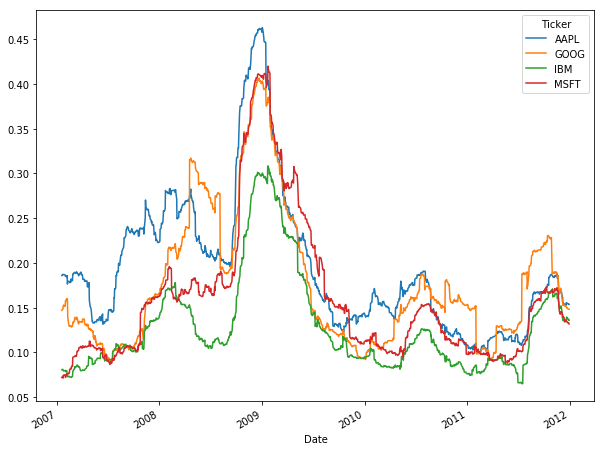

In [27]:
min_periods = 75 
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 
vol.plot(figsize=(10, 8))

we compare the volatility of a stock with another stock to get a feel for which may have less risk or we compare to a market index to examine the stock’s volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock.

# Building the ARIMA model:

## The question is how the next trade should be placed to get a positive gain?
If the closing price of the index is higher than the opening price, there is a positive gain, whereas a negative gain would be achieved if the closing price is lower than the opening price. So we know now that our target variable will be the Close value.

In [28]:
daily_close = df[['Close']].reset_index().pivot('Date', 'Ticker', 'Close')
daily_close.head()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-02,2.673571,199.970459,81.870003,27.360001
2006-10-03,2.645714,201.265610,81.650002,27.370001
2006-10-04,2.692143,207.073837,83.099998,27.940001
2006-10-05,2.672500,205.136093,82.919998,27.920000
2006-10-06,2.650714,209.464874,83.139999,27.870001


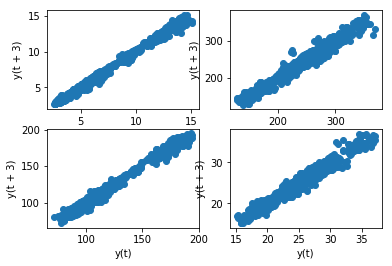

In [29]:
ax1 = plt.subplot2grid((2,2), (0,0))
ax2 = plt.subplot2grid((2,2), (0,1))
ax3 = plt.subplot2grid((2,2), (1,0))
ax4 = plt.subplot2grid((2,2), (1,1))

lag_plot(daily_close.AAPL,ax=ax1,lag=3)
lag_plot(daily_close.GOOG,ax=ax2,lag=3)
lag_plot(daily_close.IBM,ax=ax3,lag=3)
lag_plot(daily_close.MSFT,ax=ax4,lag=3)


A linear shape to the plot suggests that an autoregressive model is probably a better choice. 
And now we can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).


In [30]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 23.321313256669136


Our ARIMA model results in appreciable results. This model offers a good prediction accuracy and to be relatively fast compared to other alternatives, in terms of training/fitting time and complexity.

There is still a lot of work to be done to put this model before implementing this model into a trading system.

Typical trading systems are a conglomeration of multiple models and data sources that output trading signals. It is crucial to understand how we want to use our model to generate trading signals, and then thoroughly backtest our model accounting for all trading costs. Only then should we try to implement our system on a paper trading account and see how it does.
